# NLP Basics

In [1]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [2]:
text= """ Hello Mr.boss,Hope you are doing good.
By the way i have plan to visit to 
your house in the next week of the month"""

tokenised_text= sent_tokenize(text)
print(tokenised_text)

[' Hello Mr.boss,Hope you are doing good.', 'By the way i have plan to visit to \nyour house in the next week of the month']


In [3]:
from nltk.tokenize import word_tokenize
token_word=word_tokenize(text)
print(token_word)

['Hello', 'Mr.boss', ',', 'Hope', 'you', 'are', 'doing', 'good', '.', 'By', 'the', 'way', 'i', 'have', 'plan', 'to', 'visit', 'to', 'your', 'house', 'in', 'the', 'next', 'week', 'of', 'the', 'month']


In [4]:
from nltk.probability import FreqDist
freq_dist=FreqDist(token_word)
print(freq_dist)

<FreqDist with 24 samples and 27 outcomes>


In [5]:
freq_dist.most_common()

[('the', 3),
 ('to', 2),
 ('Hello', 1),
 ('Mr.boss', 1),
 (',', 1),
 ('Hope', 1),
 ('you', 1),
 ('are', 1),
 ('doing', 1),
 ('good', 1),
 ('.', 1),
 ('By', 1),
 ('way', 1),
 ('i', 1),
 ('have', 1),
 ('plan', 1),
 ('visit', 1),
 ('your', 1),
 ('house', 1),
 ('in', 1),
 ('next', 1),
 ('week', 1),
 ('of', 1),
 ('month', 1)]

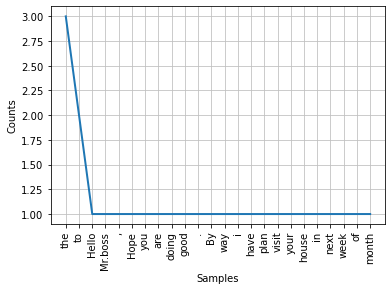

In [6]:
import matplotlib.pyplot as plt
freq_dist.plot(27,cumulative=False)
plt.show()

In [7]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
print(stop_words)

{'theirs', 'doing', 'how', "you'd", 'herself', 'as', 'the', 't', 'from', 'her', 'why', 'ours', 'by', 'shan', 'so', 'aren', 'once', "she's", 'into', 'when', 'me', 'about', "it's", 'what', 'was', 'before', 'yourself', 'this', 'above', 'down', 'because', 'just', "you'll", 'more', 'doesn', 'she', 'than', 'in', 'mustn', 'again', 'only', 'some', 's', 'him', 'has', 'here', 're', 'do', 'hadn', 'at', 'and', 'very', 'where', 'he', 'haven', 'not', 'should', 'hers', 'any', 'to', 'didn', "don't", 'nor', 'there', 'their', 'are', 'no', 'against', 'we', 'isn', 'out', "mustn't", 'until', "wouldn't", 'if', "didn't", "doesn't", "shan't", 'his', 'on', 'below', 'mightn', 'shouldn', 'you', 'these', 'couldn', 'did', 'm', "aren't", 'through', 'wouldn', 'have', 'over', 'further', 'wasn', 'were', 'having', 'who', 'too', 'ourselves', 'most', 'weren', 'himself', 've', 'y', "wasn't", 'such', 'they', 'i', 'being', 'don', "won't", 'which', 'each', 'own', 'ma', 'those', 'been', 'o', 'other', 'off', 'few', 'your', "mi

In [8]:
filtered_sent=[]
for w in token_word:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized sentences:\n\n",token_word)
print('\nAfter removing stopwords-filtered sentences\n',filtered_sent)

Tokenized sentences:

 ['Hello', 'Mr.boss', ',', 'Hope', 'you', 'are', 'doing', 'good', '.', 'By', 'the', 'way', 'i', 'have', 'plan', 'to', 'visit', 'to', 'your', 'house', 'in', 'the', 'next', 'week', 'of', 'the', 'month']

After removing stopwords-filtered sentences
 ['Hello', 'Mr.boss', ',', 'Hope', 'good', '.', 'By', 'way', 'plan', 'visit', 'house', 'next', 'week', 'month']


# Stemming

In [9]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize
ps=PorterStemmer()
stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print('Filtered Sentence\n',filtered_sent)
print('\nStemmed Words\n',stemmed_words)

Filtered Sentence
 ['Hello', 'Mr.boss', ',', 'Hope', 'good', '.', 'By', 'way', 'plan', 'visit', 'house', 'next', 'week', 'month']

Stemmed Words
 ['hello', 'mr.boss', ',', 'hope', 'good', '.', 'By', 'way', 'plan', 'visit', 'hous', 'next', 'week', 'month']


# Lemmatization

In [10]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [11]:
from nltk.stem import WordNetLemmatizer

lem=WordNetLemmatizer()
stem=PorterStemmer()
word='flying'
print('Lemmatized word \n',lem.lemmatize(word,'v'))
print('\nStemmed Word\n',stem.stem(word))

Lemmatized word 
 fly

Stemmed Word
 fli


# Chatbot Development with NLTK

## Import necessary libraries

In [12]:
import io
import random
import string # to process standard python strings
import warnings
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')

## Installing NLTK Packages

In [13]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('popular', quiet=True) # for downloading packages
#nltk.download('punkt') # first-time use only
#nltk.download('wordnet') # first-time use only

True

## Reading in the corpus

In [14]:
f=open('chatbot.txt','r',errors = 'ignore')
raw=f.read()
raw = raw.lower()# converts to lowercase

## Tokenisation

In [15]:
sent_tokens = nltk.sent_tokenize(raw)# converts to list of sentences 
word_tokens = nltk.word_tokenize(raw)# converts to list of words

## Preprocessing

In [16]:
lemmer = nltk.stem.WordNetLemmatizer()
#WordNet is a semantically-oriented dictionary of English included in NLTK.
def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

## Keyword matching

In [17]:
GREETING_INPUTS = ("hello", "hi", "greetings", "sup", "what's up","hey",)
GREETING_RESPONSES = ["hi", "hey", "*nods*", "hi there", "hello", "I am glad! You are talking to me"]
def greeting(sentence):
 
    for word in sentence.split():
        if word.lower() in GREETING_INPUTS:
            return random.choice(GREETING_RESPONSES)

## Generating Response

In [18]:
def response(user_response):
    robo_response=''
    sent_tokens.append(user_response)
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
    tfidf = TfidfVec.fit_transform(sent_tokens)
    vals = cosine_similarity(tfidf[-1], tfidf)
    idx=vals.argsort()[0][-2]
    flat = vals.flatten()
    flat.sort()
    req_tfidf = flat[-2]
    if(req_tfidf==0):
        robo_response=robo_response+"I am sorry! I don't understand you"
        return robo_response
    else:
        robo_response = robo_response+sent_tokens[idx]
        return robo_response

Finally, we will feed the lines that we want our bot to say while starting and ending a conversation depending upon user’s input.

In [19]:
flag=True
print("ROBO: My name is Robo. I will answer your queries about Chatbots. If you want to exit, type Bye!")
while(flag==True):
    user_response = input()
    user_response=user_response.lower()
    if(user_response!='bye'):
        if(user_response=='thanks' or user_response=='thank you' ):
            flag=False
            print("ROBO: You are welcome..")
        else:
            if(greeting(user_response)!=None):
                print("ROBO: "+greeting(user_response))
            else:
                print("ROBO: ",end="")
                print(response(user_response))
                sent_tokens.remove(user_response)
    else:
        flag=False
        print("ROBO: Bye! take care..")

ROBO: My name is Robo. I will answer your queries about Chatbots. If you want to exit, type Bye!
hi
ROBO: hi
bye
ROBO: Bye! take care..
